# Basic Vega Visualization

In [1]:
from vega import Vega

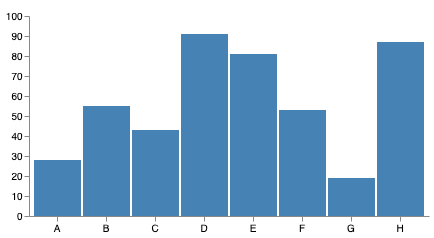

In [2]:
Vega({
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 400,
  "height": 200,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {"category": "A", "amount": 28},
        {"category": "B", "amount": 55},
        {"category": "C", "amount": 43},
        {"category": "D", "amount": 91},
        {"category": "E", "amount": 81},
        {"category": "F", "amount": 53},
        {"category": "G", "amount": 19},
        {"category": "H", "amount": 87}
      ]
    }
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "category"},
      "range": "width",
      "padding": 0.05,
      "round": True
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "amount"},
      "nice": True,
      "range": "height"
    }
  ],

  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "category"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "amount"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.category", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.amount", "offset": -2},
          "text": {"signal": "tooltip.amount"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
})